# Prewitt Sobel and Scharr Kernels implementation example

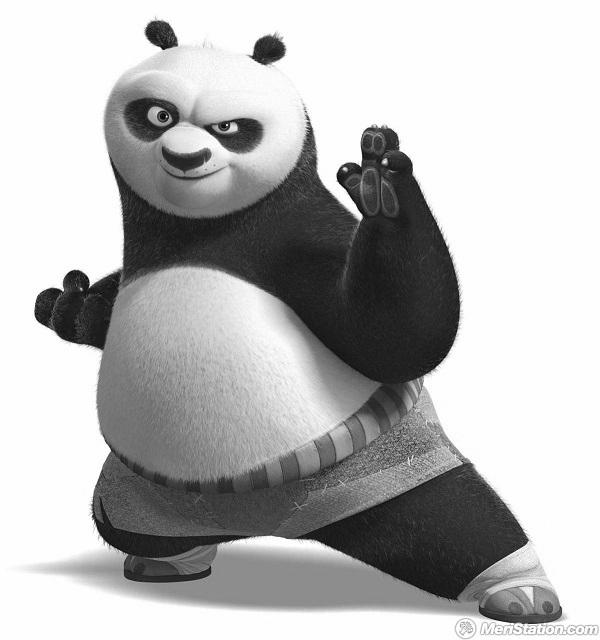

In [9]:
import PIL as pil
import numpy as np

im = pil.Image.open("pandaGris.jpg")
im

## Defining needed functions from Kernels exercise...

In [98]:
#Function to "flip" de Kernell for convolution
def flipKernel(k):
    #Get array shape
    filas = k.shape[0]
    columnas = k.shape[1]
    
    #Create resulting array
    r = np.zeros((filas, columnas))
    #print(r)
    
    #support vars
    i = j = 0
    n = m = 0
    
    for x in k:
        for val in x:
            #print(k[i,j])
            n = filas-1-i
            m = columnas-1-j
            #print("Val: %s fila: %s Col: %s" % (val, n, m))
            r[n,m] = val
            
            if (j < columnas-1):
                j = j+1
            else:
                i += 1
                j = 0
    return r

def frameWithZeros(image, kernel):
    kR = kernel.shape[0]//2
    kC = kernel.shape[1]//2
    
    #new shape to ensure resulting image is the expected size
    sR = np.zeros((image.shape[0],kR))
    nH = np.hstack((sR,image,sR))
    sC = np.zeros((kC,nH.shape[1]))
    nH = np.vstack((sC,nH,sC))
    
    return nH


def applyKernelToSegment(kernel, segment, pos):
    x = pos[0]
    y = pos[1]
    kR = kernel.shape[0]//2
    kC = kernel.shape[1]//2
    
    r = 0
    
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            r = r + (kernel[i,j] * segment[(x + (i-kR),y + (j-kC))])
       
    return r

def normaliza(np_image, treshold=140):
    scaleMax = 255 #assuming 0 - 255 resulting scale
    minval = np_image.min()
    maxval = np_image.max()
    
    r = np.zeros((np_image.shape))
    
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            tm = np.floor((np_image[i,j] + maxval) * scaleMax / (maxval - minval))
            r[i,j] = tm if (tm > treshold) else 0
            
    return r.astype(np.uint8)

def applyKernel(image, kernel, returnArr=False, treshold =140):
    np_image = np.array(image)
    kR = kernel.shape[0]//2
    kC = kernel.shape[1]//2
    r = np.zeros((np_image.shape))
    
    nImage = frameWithZeros(np_image, kernel)
    
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            #print(applyKernel(w, nH, (i+kR,j+kC)))
            r[i,j] = applyKernelToSegment(flipKernel(kernel), nImage, (i+kR,j+kC))
            
    if (returnArr):
        return normaliza(r, treshold)  
    else:
        return Image.fromarray(normaliza(r, treshold))



## Kernels....

In [63]:
prewittx = np.array([[1,0,-1],
                    [1,0,-1],
                    [1,0,-1]])

prewittx

prewitty = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])

prewitty

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

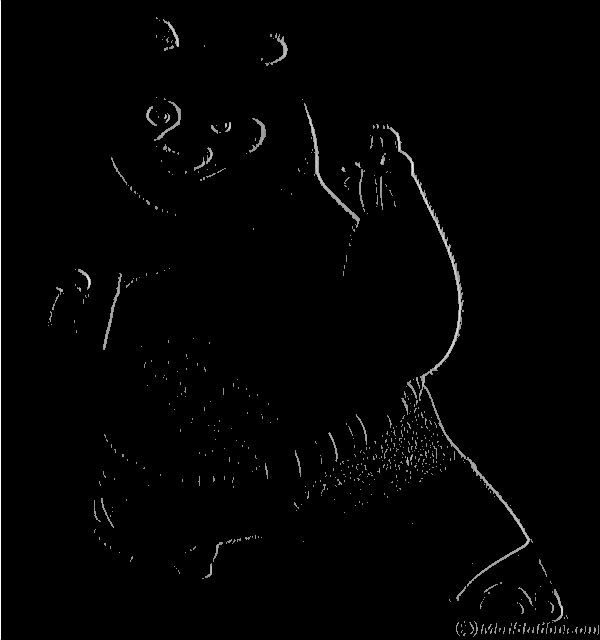

In [85]:
applyKernel(im, prewittx)

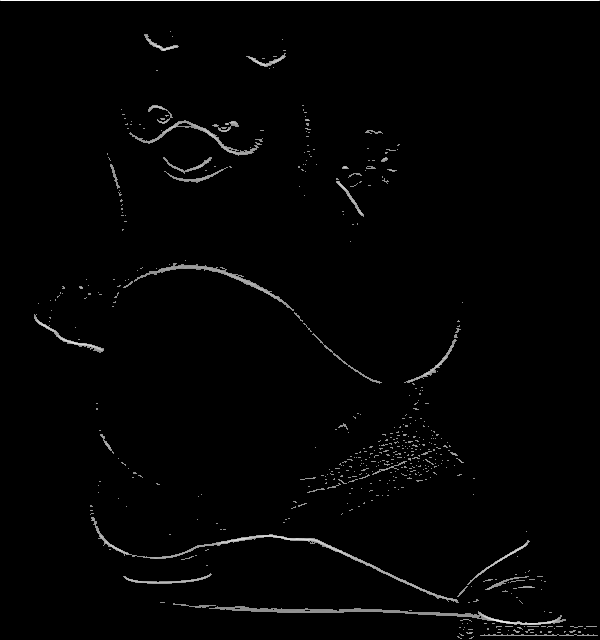

In [86]:
applyKernel(im, prewitty)

In [59]:
sobelx = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])

sobelx

sobely = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

sobely



array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

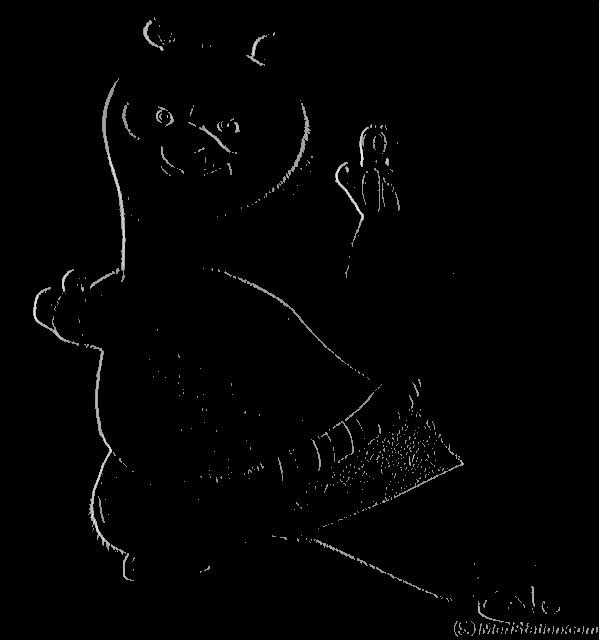

In [87]:
applyKernel(im, sobelx)


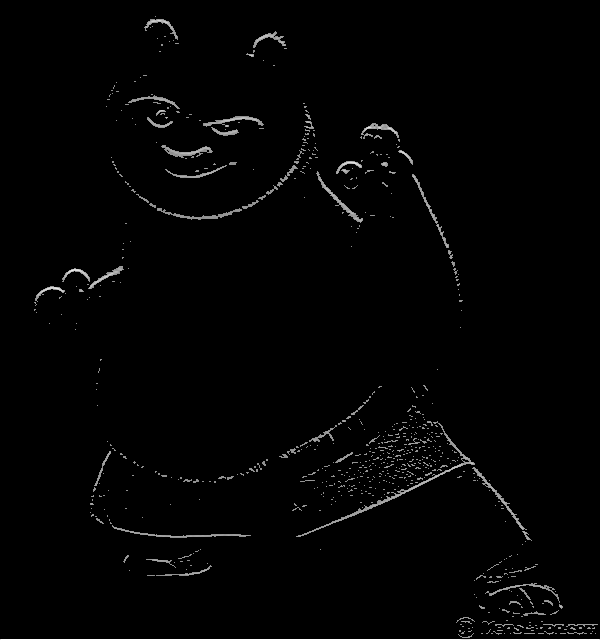

In [88]:
applyKernel(im, sobely)

In [67]:
scharrx = np.array([[3,0,-3],
                  [10,0,-10],
                  [3,0,-3]])

scharrx

scharry = np.array([[3,10,3],
                   [0,0,0],
                   [-3,-10,-3]])

scharry


array([[  3,  10,   3],
       [  0,   0,   0],
       [ -3, -10,  -3]])

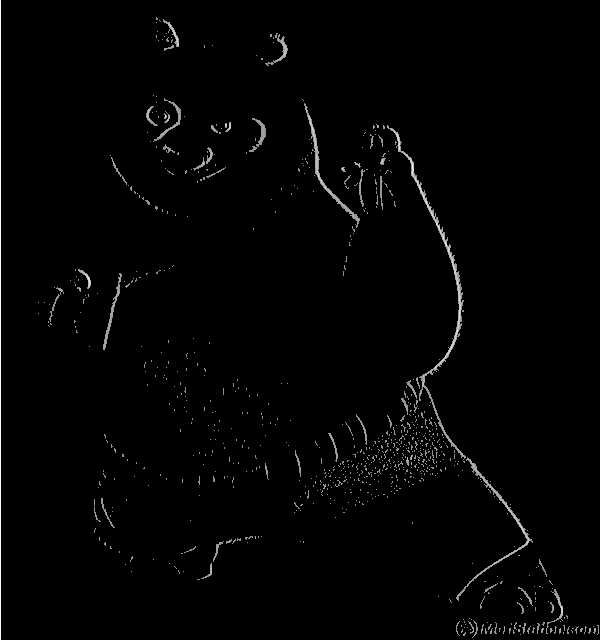

In [89]:
applyKernel(im, scharrx)

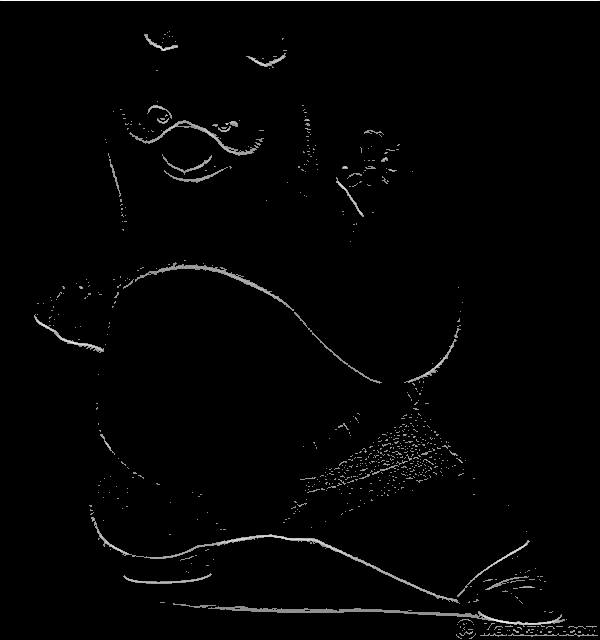

In [90]:
applyKernel(im, scharry)

# Results

## Sobel (x + y)

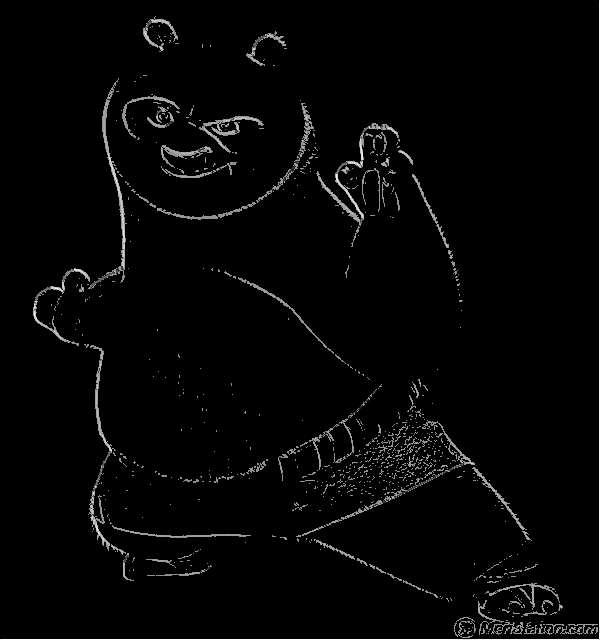

In [117]:
sx = applyKernel(im, sobelx)
sy = applyKernel(im, sobely)
Image.fromarray(np.array(sx)+np.array(sy))

## Prewitt (x + y)

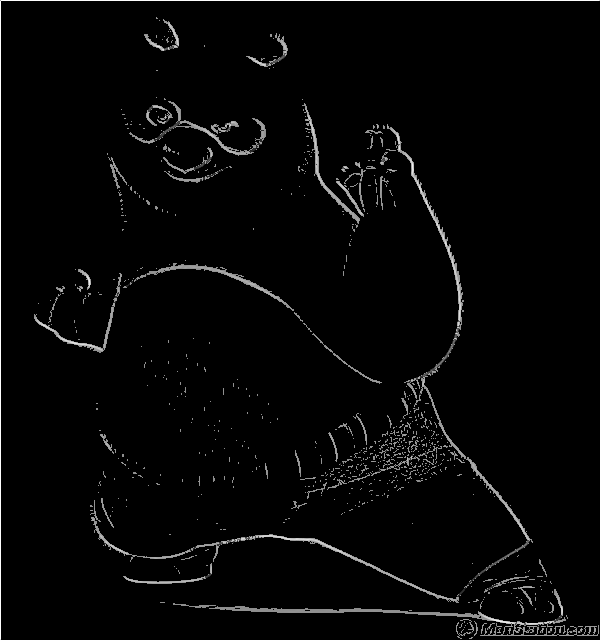

In [110]:
px = applyKernel(im, prewittx)
py = applyKernel(im, prewitty)
Image.fromarray(np.array(px)+np.array(py))

## Scharr (x + y)

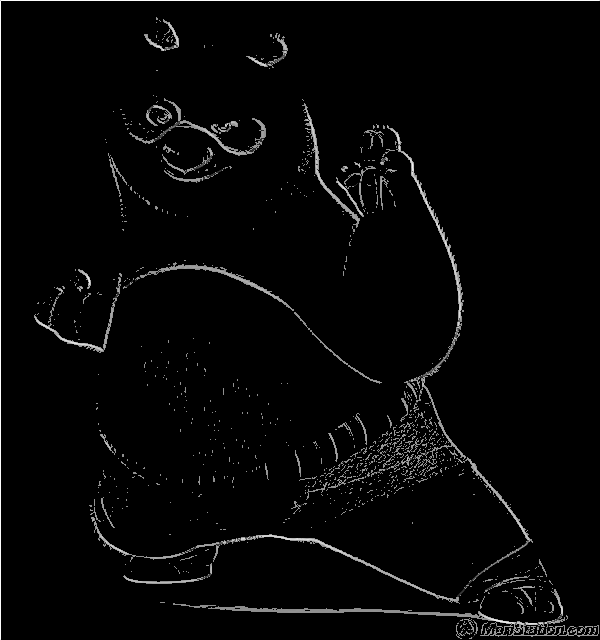

In [111]:
scx = applyKernel(im, scharrx)
scy = applyKernel(im, scharry)
Image.fromarray(np.array(scx)+np.array(scy))